## 登月图片消噪

scipy.fftpack模块用来计算快速傅里叶变换  
速度比传统傅里叶变换更快,是对之前算法的改进  
图片是二维数据,注意使用fftpack的二维转变方法

In [1]:
import scipy as sp
sp.__version__

'1.0.0'

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np

# 快速傅里叶变换
import scipy.fftpack as fftpack

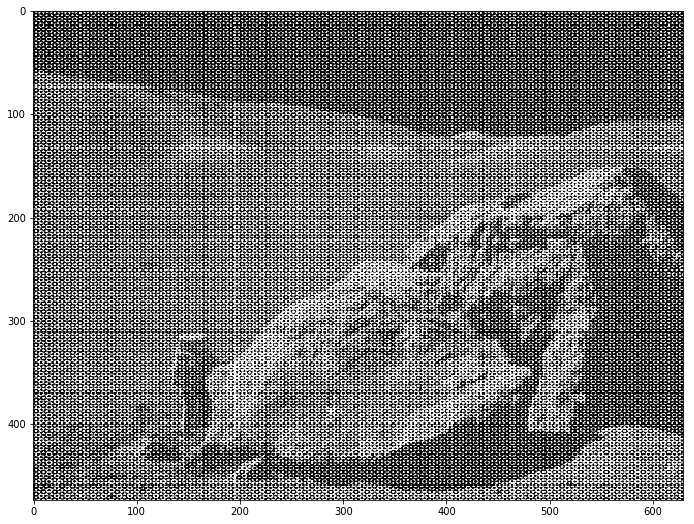

In [3]:
moon_data = plt.imread('moonlanding.png')
plt.figure(figsize=(12,9))
plt.imshow(moon_data,cmap='gray')

In [4]:
moon_data

array([[0.04705882, 0.        , 0.23921569, ..., 0.        , 0.00392157,
        0.53333336],
       [0.        , 0.        , 0.6784314 , ..., 0.10196079, 0.2901961 ,
        0.        ],
       [0.72156864, 0.10980392, 0.6039216 , ..., 0.        , 0.21568628,
        1.        ],
       ...,
       [0.00392157, 0.        , 1.        , ..., 1.        , 1.        ,
        0.95686275],
       [0.        , 0.        , 0.15686275, ..., 0.        , 0.        ,
        0.3529412 ],
       [1.        , 0.52156866, 0.04705882, ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [5]:
moon_data.shape

(474, 630)

In [6]:
# 使用scipy中快速傅里叶变换进行二维操作

moon_data_fft = fftpack.fft2(moon_data)

In [7]:
moon_data_fft

array([[126598.45      +0.       j,  -4608.5796 -1892.4688   j,
          -322.093    -20.27744  j, ...,   -906.1585 +1539.3081   j,
          -322.093    +20.27744  j,  -4608.5796 +1892.4688   j],
       [ -9421.1    +5242.1133   j,   5224.016  -3171.7434   j,
          1607.9927 +1269.4243   j, ...,   -677.34503 -936.16174  j,
           354.6247 -1003.8348   j,   1965.366  -2188.0593   j],
       [ -2928.3513 +7280.916    j,  -1116.4065 +1338.3179   j,
          -474.20056 +385.40216  j, ...,    239.7723  -977.2129   j,
          1582.9283  -261.95346  j,   2641.927   -292.09366  j],
       ...,
       [  1850.5718 -2451.1787   j,   -781.0807   +13.744501 j,
           377.90707  +12.6699295j, ...,  -1526.7869 +1271.2621   j,
         -2705.5718 -3488.529    j,   1897.404  -2281.9092   j],
       [ -2928.3513 -7280.916    j,   2641.927   +292.09366  j,
          1582.9283  +261.95346  j, ...,  -2208.4302   +81.807434 j,
          -474.20056 -385.40216  j,  -1116.4065 -1338.3179   j]

In [8]:
# 使用scipy中快速傅里叶变换进行二维的操作

moon_data_fft = fftpack.fft2(moon_data)

In [9]:
moon_data_fft

array([[126598.45      +0.       j,  -4608.5796 -1892.4688   j,
          -322.093    -20.27744  j, ...,   -906.1585 +1539.3081   j,
          -322.093    +20.27744  j,  -4608.5796 +1892.4688   j],
       [ -9421.1    +5242.1133   j,   5224.016  -3171.7434   j,
          1607.9927 +1269.4243   j, ...,   -677.34503 -936.16174  j,
           354.6247 -1003.8348   j,   1965.366  -2188.0593   j],
       [ -2928.3513 +7280.916    j,  -1116.4065 +1338.3179   j,
          -474.20056 +385.40216  j, ...,    239.7723  -977.2129   j,
          1582.9283  -261.95346  j,   2641.927   -292.09366  j],
       ...,
       [  1850.5718 -2451.1787   j,   -781.0807   +13.744501 j,
           377.90707  +12.6699295j, ...,  -1526.7869 +1271.2621   j,
         -2705.5718 -3488.529    j,   1897.404  -2281.9092   j],
       [ -2928.3513 -7280.916    j,   2641.927   +292.09366  j,
          1582.9283  +261.95346  j, ...,  -2208.4302   +81.807434 j,
          -474.20056 -385.40216  j,  -1116.4065 -1338.3179   j]

np.argmax/argmin:返回的是索引

np.where

In [10]:
# 对图片进行过滤
moon_data_fft_r = np.where(np.abs(moon_data_fft)>3e3,0,moon_data_fft)

In [11]:
# 突兀 == 高频  进行频率的过滤
# 过滤高频

condition = np.abs(moon_data_fft) > 8e2

# 查找满足这一条件的索引

# index = np.argwhere(condition)

moon_data_fft[condition] = 0


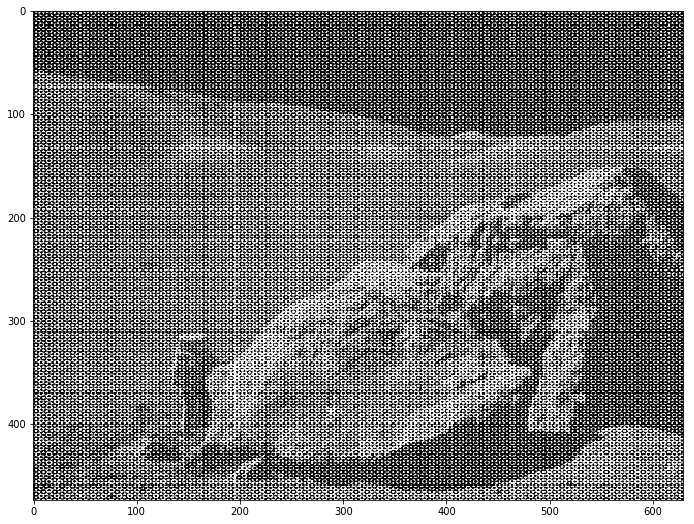

In [12]:
plt.figure(figsize =(12,9))
plt.imshow(moon_data,cmap = 'gray')

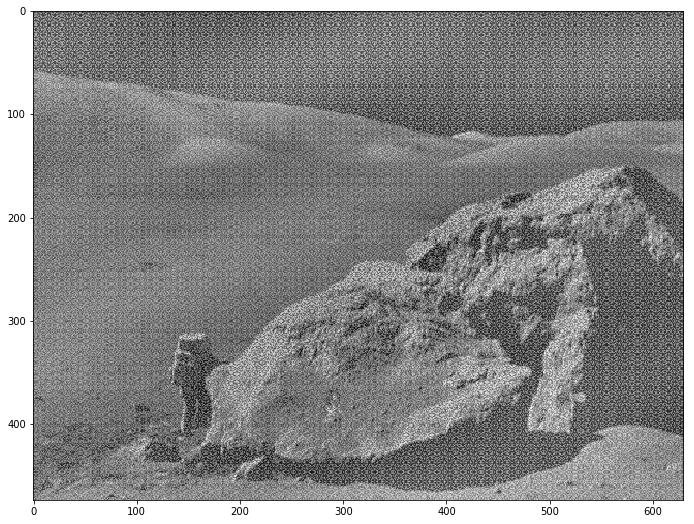

In [13]:
moon_data_ifft = fftpack.ifft2(moon_data_fft_r)

result = np.real(moon_data_ifft)


#显示
plt.figure(figsize=(12,9))
plt.imshow(result,cmap = 'gray')


In [14]:
# 对数据进行快速转换
moon_data_ifft = fftpack.ifft2(moon_data_fft)
# 用ifft2更快的算法进行转换
moon_data_result = np.real(moon_data_ifft)

In [15]:
moon_data_result.shape    

(474, 630)

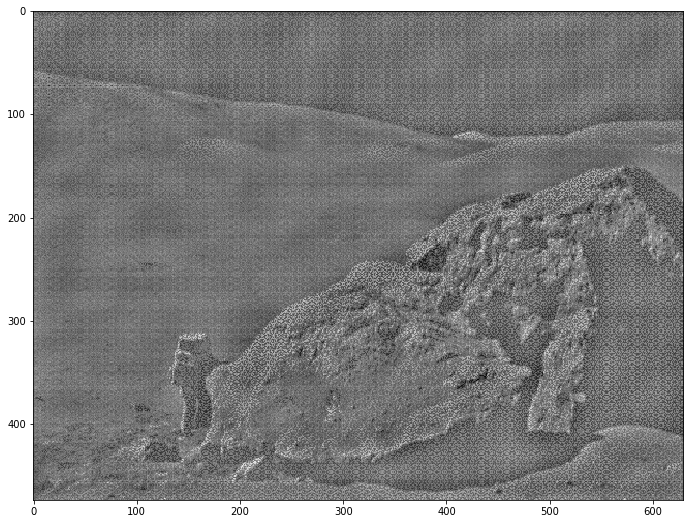

In [16]:
# 用8e2进行过滤
plt.figure(figsize=(12,9))
plt.imshow(moon_data_result,cmap='gray')

### 数值积分,求解圆周率

求解圆周率  

integrate 对函数(1-x^2)^0.5进行积分  

x^2 + y^2 = 1

首先画一个圆

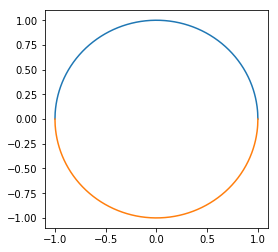

In [17]:
# x**2 + y**2 = 1
# y**2 = 1 - x**2
# f(x) = (1-x**2)**0.5

f = lambda x : (1-x**2) ** 0.5
x = np.linspace(-1,1,1000)
plt.figure(figsize=(4,4))
plt.plot(x,f(x))
plt.plot(x,-f(x))

圆的面积是?

pi*r**2 

r = 1

现在此圆的面积就是: pi

使用scipy.integrate进行积分,调用quad()方法

In [18]:
import scipy.integrate as integrate

In [19]:
# 结果,误差
# f 不需要f(x)
pi_2,err = integrate.quad(f,-1,1)

In [20]:
pi = pi_2*2
pi

r = 1
s = pi*r**2
s

3.141592653589797

### scipy 文件输入/输出


随机生成数组,使用scipy中的io.savemat()保存  
文件格式是.mat(),标准的二进制文件

In [21]:
import scipy.io as spio

In [22]:
spio.savemat('moon.mat',{'moon':moon_data})

使用io.loadmat()读取数据

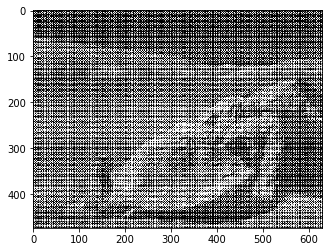

In [25]:
moon = spio.loadmat('moon.mat')['moon']
plt.imshow(moon,cmap = 'gray')

读写图片使用scipy中misc.imread()/imsave()

In [26]:
import scipy.misc as misc

In [27]:
cat_data = misc.imread('cat.jpg')

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [29]:
misc.imshow(cat_data)

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imshow` is deprecated!
`imshow` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``matplotlib.pyplot.imshow`` instead.
  """Entry point for launching an IPython kernel.


RuntimeError: Could not execute image viewer.

In [43]:
cat_angle = skimage.transform.rotate(cat_data,angle=90)

AttributeError: module 'skimage' has no attribute 'transform'

In [30]:
cat_angle = misc.imrotate(cat_data,angle=90)
misc.imshow(cat_angle)

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imrotate` is deprecated!
`imrotate` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.rotate`` instead.
  """Entry point for launching an IPython kernel.
H:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imshow` is deprecated!
`imshow` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``matplotlib.pyplot.imshow`` instead.
  


RuntimeError: Could not execute image viewer.

In [31]:
import scipy.ndimage as ndimage

In [32]:
face = misc.face(gray=False)

misc.imshow(face)

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imshow` is deprecated!
`imshow` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``matplotlib.pyplot.imshow`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


RuntimeError: Could not execute image viewer.

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

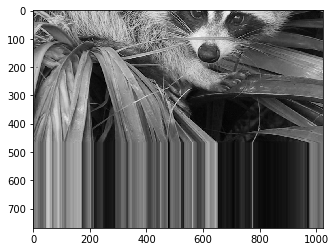

In [34]:
#'constant', 'nearest', 'reflect', 'mirror' or 'wrap'

#sequence argument must have length equal to input rank
face_shift = ndimage.shift(face,(-300,0,4),mode='nearest')
plt.imshow(face_shift,cmap = 'gray')

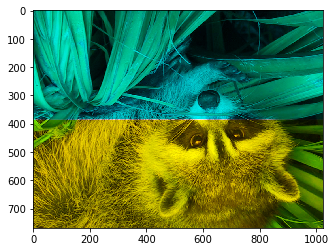

In [35]:
face_rotate = ndimage.rotate(face,180,axes=(-1,-3))

plt.imshow(face_rotate,cmap = 'gray')

H:\Anaconda\lib\site-packages\scipy\ndimage\interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


TypeError: Invalid dimensions for image data

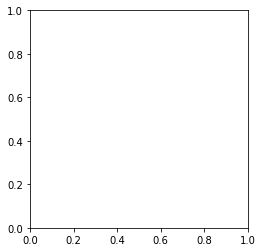

In [38]:
face_zoom = ndimage.zoom(face,zoom = 0.01)


plt.imshow(face_zoom,cmap = 'gray')

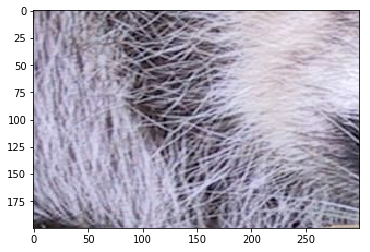

In [39]:
#数组的切片
face_mini = face[200:400,200:500]

plt.imshow(face_mini,cmap = 'gray')

In [40]:
face = misc.face(gray=True)

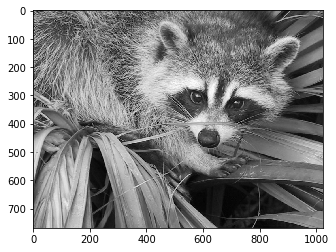

In [41]:
plt.imshow(face,cmap = 'gray')

In [42]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [43]:
face.shape

(768, 1024)

In [44]:
face.std()

54.721679908790065

In [45]:
face.dtype

dtype('uint8')

In [46]:
np.random.rand(768,1024).dtype

dtype('float64')

In [47]:
noisy_face = face.copy().astype(float)

In [48]:
#为清晰的图片的添加噪声，变模糊
noisy_face += face.std()*0.3*np.random.standard_normal(face.shape)

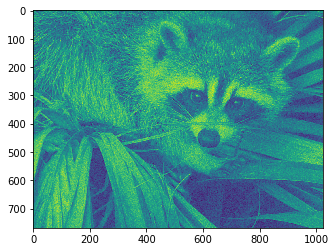

In [49]:
plt.imshow(noisy_face)

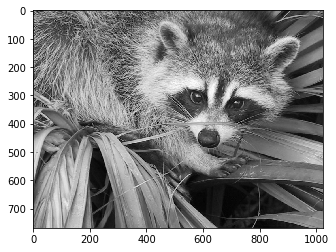

In [50]:
plt.imshow(face,cmap = 'gray')

In [51]:
face_gaussian = ndimage.gaussian_filter(noisy_face,sigma=1)

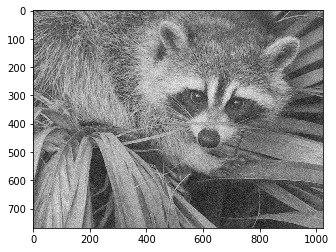

In [52]:
plt.imshow(noisy_face,cmap = 'gray')

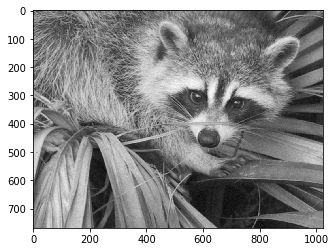

In [53]:
plt.imshow(face_gaussian,cmap = 'gray')

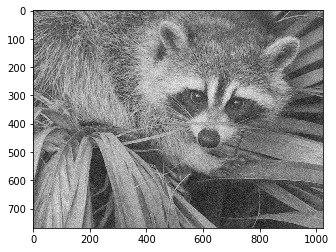

In [54]:
plt.imshow(noisy_face,cmap = 'gray')

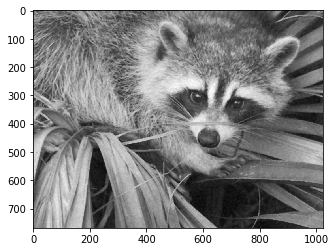

In [55]:
face_median = ndimage.median_filter(noisy_face,size = 5)

plt.imshow(face_median,cmap = 'gray')

In [56]:
import scipy.signal as signal

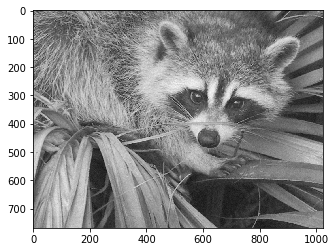

In [57]:
face_wiener = signal.wiener(noisy_face,mysize=3)
plt.imshow(face_wiener,cmap = 'gray')

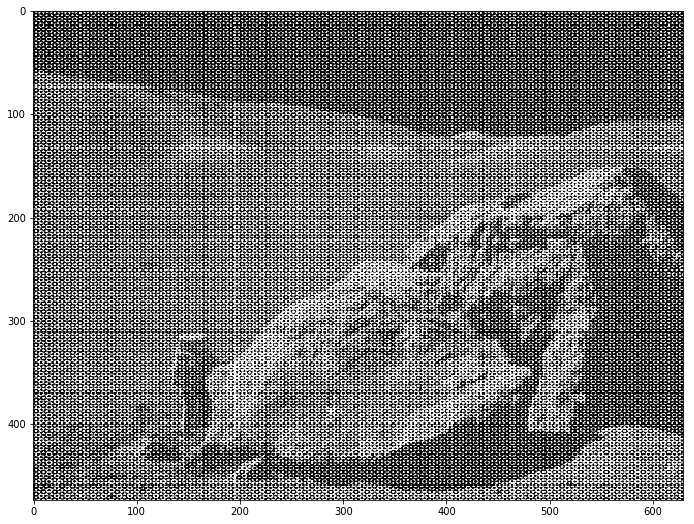

In [58]:
moon = plt.imread('moonlanding.png')

plt.figure(figsize=(12,9))
plt.imshow(moon,cmap = 'gray')

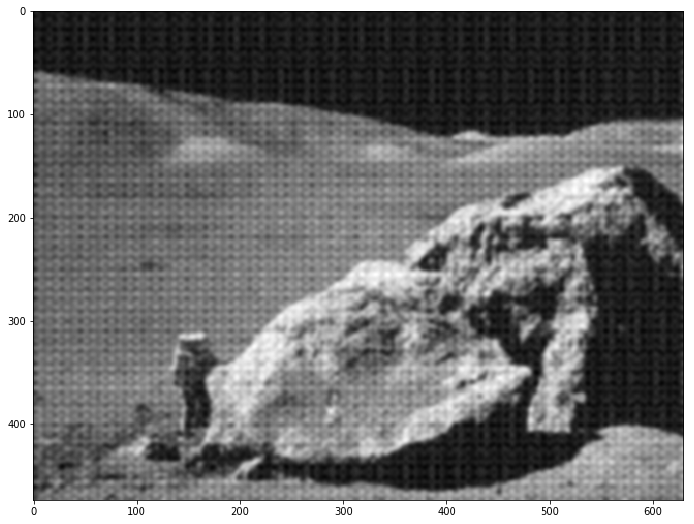

In [59]:
moon_gaussian = ndimage.gaussian_filter(moon,sigma=2)

plt.figure(figsize=(12,9))
plt.imshow(moon_gaussian,cmap = 'gray')

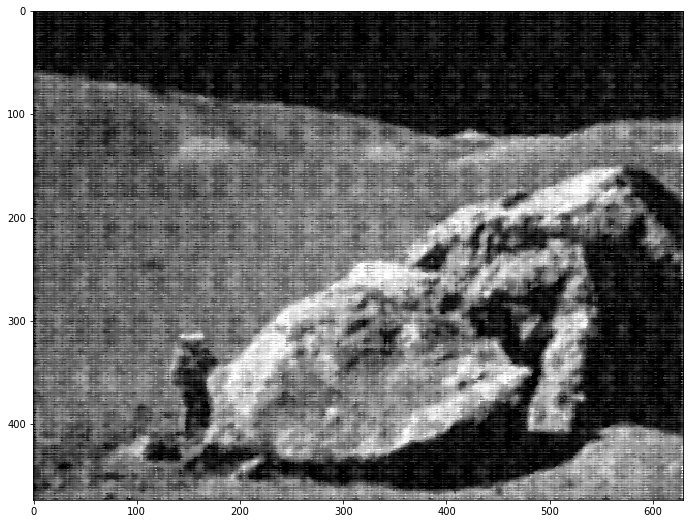

In [60]:
moon_median = ndimage.median_filter(moon,size=7)

plt.figure(figsize=(12,9))
plt.imshow(moon_median,cmap = 'gray')